<a href="https://colab.research.google.com/github/YehorChykin/HW_DS/blob/main/HW_DS_M5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт бібліотек

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Необхідно виконати:


    Прочитайте csv файл (використовуйте функцію read_csv)
    Виведіть перші п'ять рядків (використовується функція head)
    Виведіть розміри датасету (використовуйте атрибут shape)

In [59]:
df = pd.read_csv("/content/drive/MyDrive/DS_and_ML/bestsellers with categories.csv")
print(df.head())
print(df.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


Про скільки книг зберігає дані датасет? (Дві відповіді, ті самі)

In [60]:
df['Book_Author'] = df['Name'] + ' - ' + df['Author']
unique_books_count = df.groupby('Book_Author').size()
print("Кількість унікальних книг:", len(unique_books_count))
df = df.drop(columns=['Book_Author'])
print(df.head())

Кількість унікальних книг: 351
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [61]:
unique_books_count = df.groupby(['Name', 'Author']).size()
print("Кількість унікальних книг:", len(unique_books_count))

Кількість унікальних книг: 351


Використовуємо Columns

In [62]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

In [63]:
missing_values = df.isna().sum()
print(missing_values)
print("Чи є в якихось змінних пропуски? - Ні")

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Чи є в якихось змінних пропуски? - Ні


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри?

In [64]:
unique_genres = df['genre'].unique()
print(unique_genres)


['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

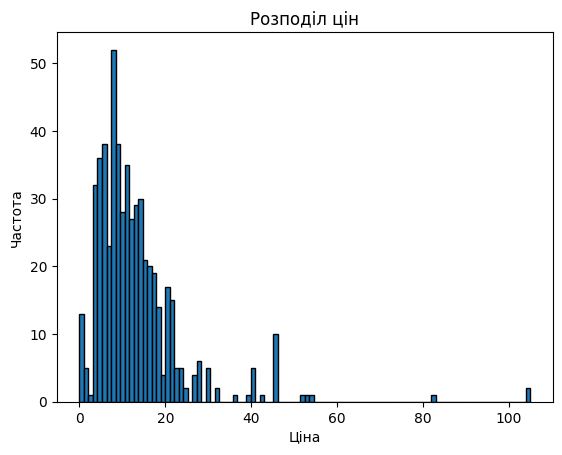

In [65]:
df['price'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()


Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
Відповідь: Максимальна ціна?
Відповідь: Мінімальна ціна?
Відповідь: Середня ціна?
Відповідь: Медіанна ціна?

In [66]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Який рейтинг у датасеті найвищий? Відповідь:

In [67]:
max_rating = df['user_rating'].max()
print("Найвищий рейтинг:", max_rating)


Найвищий рейтинг: 4.9


Скільки книг мають такий рейтинг?

In [68]:
books_with_max_rating = df[df['user_rating'] == max_rating]
num_books_with_max_rating = len(books_with_max_rating)
print("Кількість книг з найвищим рейтингом:", num_books_with_max_rating)


Кількість книг з найвищим рейтингом: 52


Яка книга має найбільше відгуків?

In [72]:
book_with_most_reviews_index = df['reviews'].idxmax()
book_with_most_reviews = df.loc[book_with_most_reviews_index, 'name']
print("Книга з найбільшою кількістю відгуків:", book_with_most_reviews)

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [73]:
most_expensive_book_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]
print("Найдорожча книга серед книг 2015 року:")
print("Назва:", most_expensive_book_2015['name'].iloc[0])
print("Ціна:", most_expensive_book_2015['price'].iloc[0])

Найдорожча книга серед книг 2015 року:
Назва: Publication Manual of the American Psychological Association, 6th Edition
Ціна: 46
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


In [75]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [81]:
fiction_books_2010 = df[(df['genre'] == 'fiction') & (df['year'] == 2010)]
fiction_books_count_2010 = len(fiction_books_2010)
print("Кількість книг жанру fiction у Топ-50 у 2010 році:", fiction_books_count_2010)


Кількість книг жанру fiction у Топ-50 у 2010 році: 0


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [82]:
high_rated_books_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
high_rated_books_count_2010_2011 = len(high_rated_books_2010_2011)
print("Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках:", high_rated_books_count_2010_2011)

Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку?

In [85]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book = sorted_books_2015_under_8.iloc[-1]
books_with_price_7 = df[(df['year'] == 2015) & (df['price'] == 7)].shape[0]
print("Остання книга у відсортованому списку:")
print(last_book)
print("Кількість книг, що коштують 7 доларів у 2015 році:", books_with_price_7)

Остання книга у відсортованому списку:
name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object
Кількість книг, що коштують 7 доларів у 2015 році: 1


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
Відповідь: Максимальна ціна для жанру Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [86]:
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
fiction_max_price = genre_prices.loc['Fiction', 'max']
fiction_min_price = genre_prices.loc['Fiction', 'min']
non_fiction_max_price = genre_prices.loc['Non Fiction', 'max']
non_fiction_min_price = genre_prices.loc['Non Fiction', 'min']

print("Максимальна ціна для жанру Fiction:", fiction_max_price)
print("Мінімальна ціна для жанру Fiction:", fiction_min_price)
print("Максимальна ціна для жанру Non Fiction:", non_fiction_max_price)
print("Мінімальна ціна для жанру Non Fiction:", non_fiction_min_price)

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: Якої розмірності вийшла таблиця? Відповідь:

Відповідь: Який автор має найбільше книг? Відповідь:

Відповідь: Скільки книг цього автора? Відповідь:

In [94]:
author_books_count = df.groupby('author').size().reset_index(name='books_count')
print(author_books_count)
print("Розмірність: 248 авторів")
author_with_most_books = author_books_count.loc[author_books_count['books_count'].idxmax()]
print("Найбільше книг = 12, автор:", author_with_most_books)

                         author  books_count
0              Abraham Verghese            2
1                Adam Gasiewski            1
2                 Adam Mansbach            1
3                     Adir Levy            1
4    Admiral William H. McRaven            1
..                          ...          ...
243             Walter Isaacson            3
244               William Davis            2
245            William P. Young            2
246            Wizards RPG Team            3
247                Zhi Gang Sha            2

[248 rows x 2 columns]
Розмірність: 248 авторів
Найбільше книг = 12, автор: author         Jeff Kinney
books_count             12
Name: 120, dtype: object


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [102]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
print(author_avg_rating)
author_with_min_avg_rating = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
print(author_with_min_avg_rating)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]
author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Відповідь: Який автор перший у списку?

In [112]:
merged_df = pd.concat([author_books_count, author_avg_rating.reset_index(drop=True)], axis=1)
print(merged_df)
sorted_merged_df = merged_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])
print(sorted_merged_df)
first_author = sorted_merged_df.iloc[0]['author']
print(first_author)

                         author  books_count                      author  \
0              Abraham Verghese            2            Abraham Verghese   
1                Adam Gasiewski            1              Adam Gasiewski   
2                 Adam Mansbach            1               Adam Mansbach   
3                     Adir Levy            1                   Adir Levy   
4    Admiral William H. McRaven            1  Admiral William H. McRaven   
..                          ...          ...                         ...   
243             Walter Isaacson            3             Walter Isaacson   
244               William Davis            2               William Davis   
245            William P. Young            2            William P. Young   
246            Wizards RPG Team            3            Wizards RPG Team   
247                Zhi Gang Sha            2                Zhi Gang Sha   

     avg_rating  
0      4.600000  
1      4.400000  
2      4.800000  
3      4.800000